In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys
import os
address = (os.sep).join(os.getcwd().split(os.sep)[:-2])
print(address)
sys.path.append(address)
print(sys.path)
import util.items as items

C:\Users\Martin\Projects\OSRS_Research
['C:\\Users\\Martin\\Projects\\OSRS_Research\\ML\\OSRS', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\python37.zip', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\DLLs', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37', '', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages', 'c:\\users\\martin\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Martin\\.ipython', 'C:\\Users\\Martin\\Projects\\OSRS_Research']


In [2]:
import keras
from keras.layers import InputLayer
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
item = "Granite_maul"

In [4]:
similar = items.getSimilarItems(item)
print(similar)
similar = [a[0] for a in similar]
similar = similar[:]
print(similar)

[('Granite_hammer', 14), ('Elder_maul', 13), ('Granite_longsword', 12), ('Granite_boots', 12), ('Granite_ring', 12)]
['Granite_hammer', 'Elder_maul', 'Granite_longsword', 'Granite_boots', 'Granite_ring']


In [5]:
items.getPrices(item)[-10:]

[30304, 30366, 30443, 30267, 30233, 30226, 30229, 30219, 30159, 30079]

In [6]:
items.getInfo(item)

{'members': 'True',
 'edible': 'False',
 'update': '/w/Update:Slayer_Skill',
 'quest': 'No',
 'destroy': 'Drop',
 'image': '/w/File:Granite_maul.png',
 'lowAlch': '20000',
 'examine': 'Simplicity is the best weapon.',
 'highAlch': '30000',
 'storeprice': 'N/A',
 'seller': 'N/A',
 'equipable': 'True',
 'weight': '4.535',
 'released': '26 January 2005',
 'storeCurrency': 'N/A',
 'name': 'Granite_maul',
 'alchable': 'True',
 'exchangePrice': '29989',
 'tradeable': 'True',
 'buyLimit': '70',
 'noteable': 'True',
 'stackable': 'False'}

1312 0


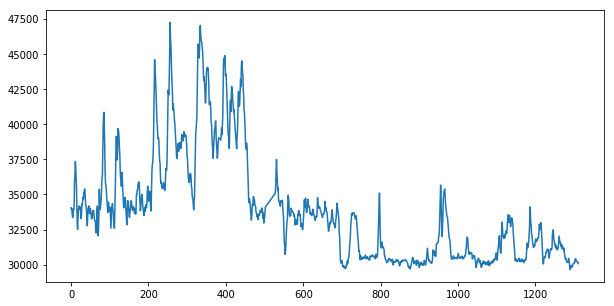

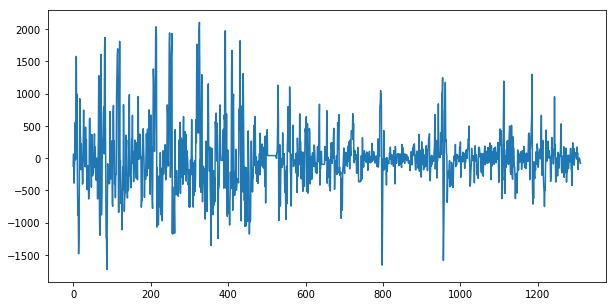

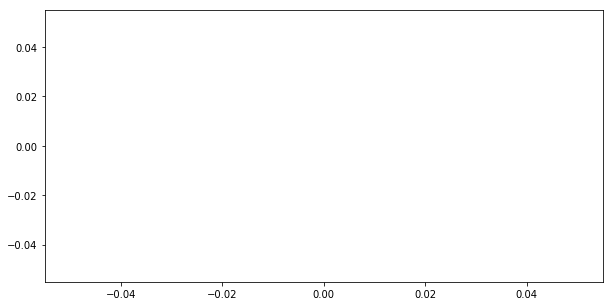

In [7]:
ma = 21
prices = items.getPrices(item)
changes = items.getPriceChanges(item)
quant = items.getQuants(item)
print(len(prices),len(quant))
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(prices,label='Price')
plt.show()
plt.plot(changes)
plt.show()
plt.plot(quant)
plt.show()

1301 1301


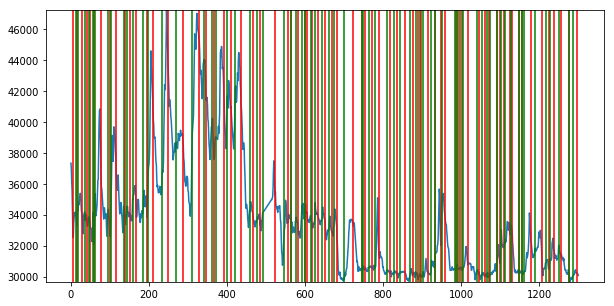

In [8]:
ma12 = items.sma(prices,12)
ma3 = items.sma(prices,3)[-1*len(ma12):]
print(len(ma3),len(ma12))

smaSell = []
smaBuy = []
for i in range(1,len(ma12)):
    if ma3[i-1]>ma12[i-1] and ma3[i]<ma12[i]:
        smaSell.append(i)
    if ma3[i-1]<ma12[i-1] and ma3[i]>ma12[i]:
        smaBuy.append(i)
        
smaSignals = [0]*len(ma12)
for a in smaSell:
    smaSignals[a] = -1
for a in smaBuy:
    smaSignals[a] = 1
        
plt.plot(prices[-1*len(ma12):])
top = max(prices)+1
for c in smaSell:
    plt.plot([c,c],[0,top],'r')
for c in smaBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

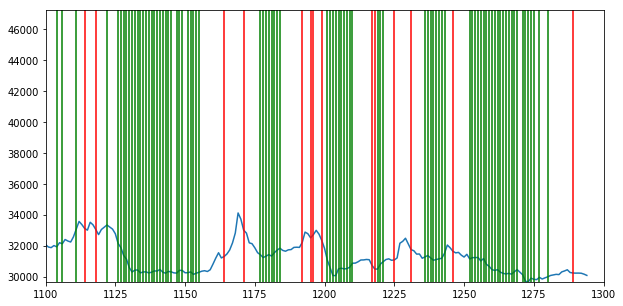

In [9]:
kSlow, D = items.stochOscil(prices)
kSlow = kSlow[-1*len(D):]
    
stochSell = []
stochBuy = []
for i in range(1,len(D)):
    if kSlow[i]<20:
        stochBuy.append(i)
    elif kSlow[i]<80 and D[i]<80 and kSlow[i-1]<D[i-1] and kSlow[i]>D[i]:
        stochBuy.append(i)
    if kSlow[i-1]>kSlow[i] and kSlow[i-1]>90:
        stochSell.append(i)
        
stochSignals = [0]*len(D)
for a in stochSell:
    stochSignals[a] = -1
for a in stochBuy:
    stochSignals[a] = 1
        
plt.plot(prices[-1*len(D):])
top = max(prices)+1
for c in stochSell:
    plt.plot([c,c],[0,top],'r')
for c in stochBuy:
    plt.plot([c,c],[0,top],'g')
plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

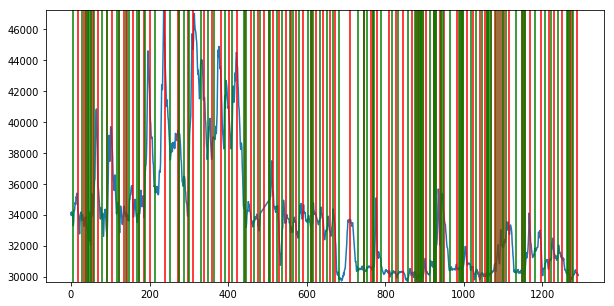

In [10]:
mom, momMA = items.momentum(prices)
mom = mom[-1*len(momMA):]

momSell = []
momBuy = []
for i in range(1,len(momMA)):
    if mom[i-1]>momMA[i-1] and mom[i]<momMA[i]:
        momSell.append(i)
    if mom[i-1]<momMA[i-1] and mom[i]>momMA[i]:
        momBuy.append(i)

momSignals = [0]*len(momMA)
for a in momSell:
    momSignals[a] = -1
for a in momBuy:
    momSignals[a] = 1
        
plt.plot(prices[-1*len(momMA):])
top = max(prices)+1
for c in momSell:
    plt.plot([c,c],[0,top],'r')
for c in momBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

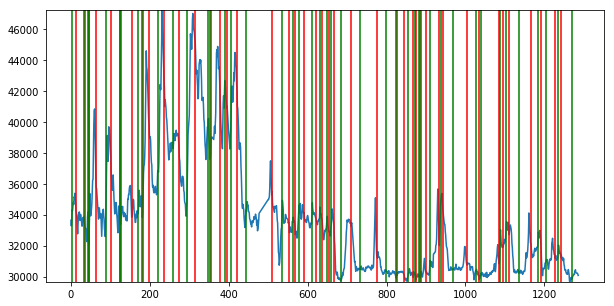

In [11]:
ema9, macd = items.macd(prices)
ema9 = ema9[-1*len(macd):]

macdSell = []
macdBuy = []
for i in range(1,len(macd)):
    if ema9[i-1]>macd[i-1] and ema9[i]<macd[i]:
        macdSell.append(i)
    if ema9[i-1]<macd[i-1] and ema9[i]>macd[i]:
        macdBuy.append(i)
        
macdSignals = [0]*len(macd)
for a in macdSell:
    macdSignals[a] = -1
for a in macdBuy:
    macdSignals[a] = 1
        
plt.plot(prices[-1*len(macd):])
top = max(prices)+1
for c in macdSell:
    plt.plot([c,c],[0,top],'r')
for c in macdBuy:
    plt.plot([c,c],[0,top],'g')
#plt.xlim(1100,1300)
plt.ylim(min(prices),top)
plt.show()

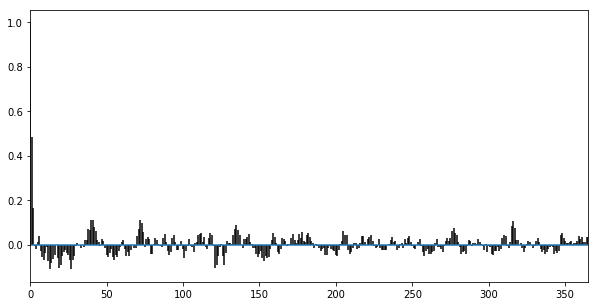

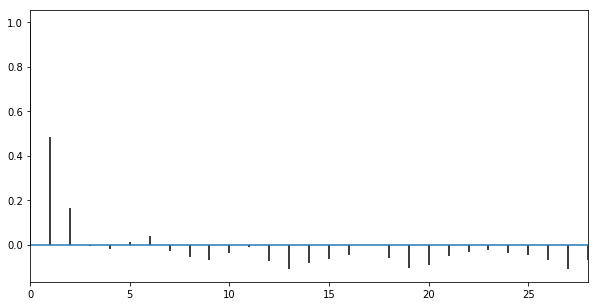

In [12]:
plt.acorr(changes,maxlags=365)
plt.xlim(0,365)
plt.show()
plt.acorr(changes,maxlags=28)
plt.xlim(0,28)
plt.show()

In [13]:
def classify(d):
    if d>=0:
        return 1
    if d<0:
        return 0

In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

#features = [changes,momSignals,smaSignals,stochSignals,macdSignals]
#features = [changes]
#features = [smaSignals,momSignals,stochSignals,macdSignals]
features = [changes,ma3,ma12,ema9,macd]

fsizes = [5,5,5,5,0]

x = []
y = []
p = []
size = sum(fsizes)

fsMax = max(fsizes)

fMin = len(features[0])
for f in features:
    if len(f)<fMin:
        fMin=len(f)
        
for i in range(len(features)):
    features[i] = features[i][-1*fMin:]

s1 = int(len(features[0])*.8)
s2  =int(len(features[0])*.9)
for i in range(len(features)):
    features[i][:s2] = list(scaler.fit_transform(np.array(features[i][:s2]).reshape(-1, 1)).reshape(len(features[i][:s2]),))
    features[i][s2:] = list(scaler.fit_transform(np.array(features[i][s2:]).reshape(-1, 1)).reshape(len(features[i][s2:]),))
    
for i in range(-1*fMin+fsMax,0,1):
    xelem = []
    for j in range(len(features)):
        xelem = xelem + list(features[j][i-fsizes[j]:i])
    x.append(xelem)
    y.append(changes[i])
    p.append(prices[i])
    
y[:s2] = scaler.fit_transform(np.array(y[:s2]).reshape(-1, 1)).reshape(len(y[:s2]),)
y[s2:] = scaler.fit_transform(np.array(y[s2:]).reshape(-1, 1)).reshape(len(y[s2:]),)
    
print(x[0],x[-1])
print(len(x[0]),len(x[-1]))
print(y[0],y[-1])
print(x[-1],y[-2])
#y = keras.utils.to_categorical(y, num_classes=2)

[-0.309119414685132, -0.2903057224980403, 0.05199895479487843, 0.2897831199372876, -0.12620851842174033, -0.5085380762708521, -0.5382734550617184, -0.5571637023307169, -0.5308593287849509, -0.49217178688330654, -0.5011010906040273, -0.5243603187919469, -0.5290478187919471, -0.5134018456375836, -0.49515520134228164, -0.18738675910262526, -0.21008869316307527, -0.21678763938491175, -0.1949997679412675, -0.1789096535588075] [-0.30014641288433375, -0.2737920937042459, -0.2640312347486578, -0.2767203513909223, -0.3255246461688628, -0.7098167991704116, -0.7473211199446936, -0.7538886968544762, -0.756308330452816, -0.7678880055305921, -0.8091603053435108, -0.7843022117831282, -0.764206955046653, -0.7492007568343446, -0.7436549879298013, -0.353127425568306, -0.34206746957171774, -0.33195584186832405, -0.32461529937726286, -0.3268866446241238]
20 20
0.04363731382283767 -0.21197886083382267
[-0.30014641288433375, -0.2737920937042459, -0.2640312347486578, -0.2767203513909223, -0.3255246461688628,

1029 1029 129 129 124 124 124
20 [-0.30911941 -0.29030572  0.05199895  0.28978312 -0.12620852 -0.50853808
 -0.53827346 -0.5571637  -0.53085933 -0.49217179 -0.50110109 -0.52436032
 -0.52904782 -0.51340185 -0.4951552  -0.18738676 -0.21008869 -0.21678764
 -0.19499977 -0.17890965]
0.04363731382283767
20 [-0.00829673  0.17520742  0.35480722  1.         -0.65739385 -0.09661251
  0.05565157  0.28983754  0.7025579   0.96785344 -0.20871664 -0.0847524
  0.07620539  0.31982775  0.54067985  0.10352768  0.24131473  0.43735448
  0.77406136  0.96729136]
-0.9541984732824428


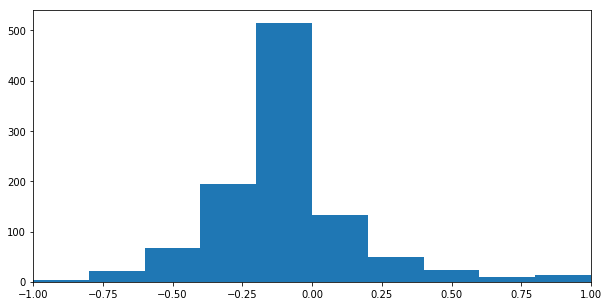

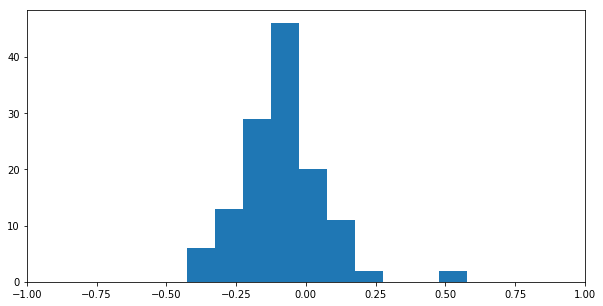

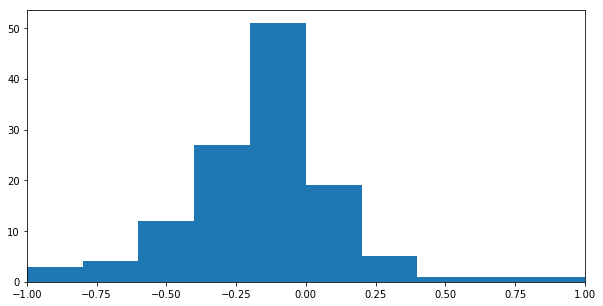

In [86]:
#scaler.fit_transform(np.array(changes).reshape(-1, 1)).reshape(len(changes),)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

x_train = np.array(x[:s1])
y_train = np.array(y[:s1])

x_val = np.array(x[s1:s2])
y_val = np.array(y[s1:s2])
p_val = np.array(p[s1:s2])

x_test = np.array(x[s2:])
y_test = np.array(y[s2:])
p_test = np.array(p[s2:])

print(len(x_train),len(y_train),len(x_val),len(y_val),len(x_test),len(y_test),len(p_test))
print(len(x_train[0]),x_train[0])
print(y_train[0])
print(len(x_test[0]),x_test[0])
print(y_test[0])
plt.hist(y_train)
plt.xlim(-1,1)
plt.show()
plt.hist(y_val)
plt.xlim(-1,1)
plt.show()
plt.hist(y_test)
plt.xlim(-1,1)
plt.show()

In [87]:
model = Sequential()
model.add(Dense(int(size), input_dim=size, activation='relu'))
model.add(Dense(int(size), activation='relu'))
model.add(Dense(1))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 21        
Total params: 861
Trainable params: 861
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

history = model.fit(x_train, y_train,
            validation_data=(x_val,y_val),
            epochs=100,
            batch_size=16)

Train on 1029 samples, validate on 129 samples
Epoch 1/100
1029/1029 [==============================] - 1s 585us/step - loss: 0.0794 - mean_squared_error: 0.0794 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 2/100
1029/1029 [==============================] - 0s 61us/step - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0232 - val_mean_squared_error: 0.0232
Epoch 3/100
1029/1029 [==============================] - 0s 61us/step - loss: 0.0554 - mean_squared_error: 0.0554 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 4/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0529 - mean_squared_error: 0.0529 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 5/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 6/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0488 - mean_squared_error: 0.0488 - val_lo

Epoch 50/100
1029/1029 [==============================] - 0s 65us/step - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 51/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 52/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 53/100
1029/1029 [==============================] - 0s 64us/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0330 - val_mean_squared_error: 0.0330
Epoch 54/100
1029/1029 [==============================] - 0s 63us/step - loss: 0.0358 - mean_squared_error: 0.0358 - val_loss: 0.0326 - val_mean_squared_error: 0.0326
Epoch 55/100
1029/1029 [==============================] - 0s 65us/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0334 - val_mean_squared_error: 0.033

1029/1029 [==============================] - 0s 63us/step - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0448 - val_mean_squared_error: 0.0448
Epoch 100/100
1029/1029 [==============================] - 0s 65us/step - loss: 0.0314 - mean_squared_error: 0.0314 - val_loss: 0.0453 - val_mean_squared_error: 0.0453


In [89]:
score = model.evaluate(x_test, y_test, batch_size=1)
print(model.metrics_names)
print(score)

y_pred = model.predict(x_test)
true_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]>.5])
false_pos = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]>.5 and y_test[i]<.5])
true_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]<.5])
false_neg = len([y_pred[i] for i in range(len(y_pred)) if y_pred[i]<.5 and y_test[i]>.5])
print(true_pos,false_pos,true_neg,false_neg,true_pos+true_neg+false_pos+false_neg)
print('Accuracy: ', (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg))
prec = (true_pos)/(true_pos+false_pos)
print('Precision: ', prec)
recall = (true_pos)/(true_pos+false_neg)
print('Recall: ', recall)
print('F1: ', (2*recall*prec)/(recall+prec))

124/124 [==============================] - 0s 387us/step
['loss', 'mean_squared_error']
[0.08875647793560816, 0.08875647793560816]
0 2 119 3 124
Accuracy:  0.9596774193548387
Precision:  0.0
Recall:  0.0


ZeroDivisionError: float division by zero

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


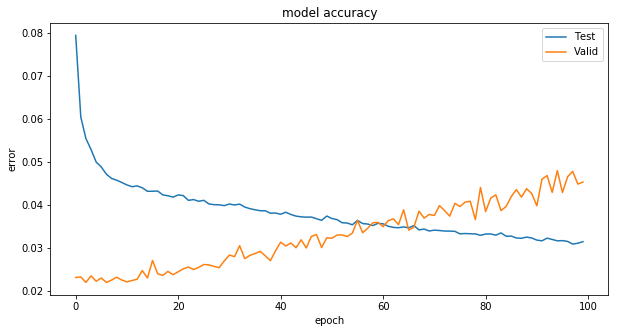

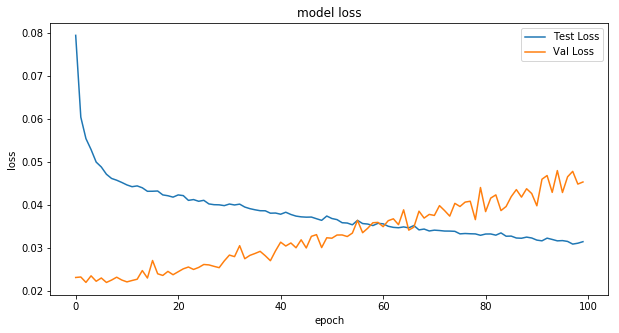

In [90]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'],label='Test')
plt.plot(history.history['val_mean_squared_error'],label='Valid')
plt.title('model accuracy')
plt.ylabel('error')
plt.xlabel('epoch')
plt.legend()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'],label='Test Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [91]:
print(y_test[:20])
print(p_test[:20])

[-9.54198473e-01 -3.43511450e-01 -8.54374633e-01 -1.84967704e-01
 -4.29242513e-01 -4.89136817e-01 -2.73047563e-01 -3.34116265e-01
 -1.11567821e-02 -5.87199060e-04 -2.28420435e-01  1.41514974e-01
  7.45742807e-02  2.75983558e-02 -2.84791544e-01 -1.80270112e-01
 -1.35055784e-02 -9.68878450e-02  4.63887258e-02 -1.03934234e-01]
[33004. 32812. 32185. 32128. 31863. 31547. 31415. 31231. 31322. 31422.
 31328. 31549. 31713. 31837. 31695. 31642. 31731. 31749. 31889. 31901.]


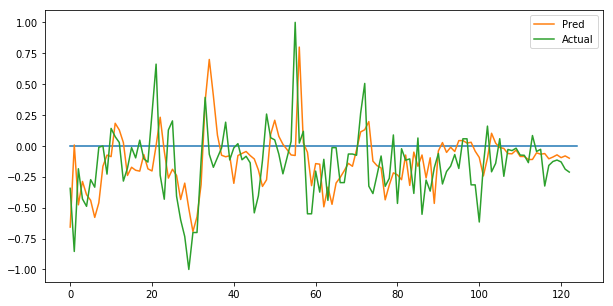

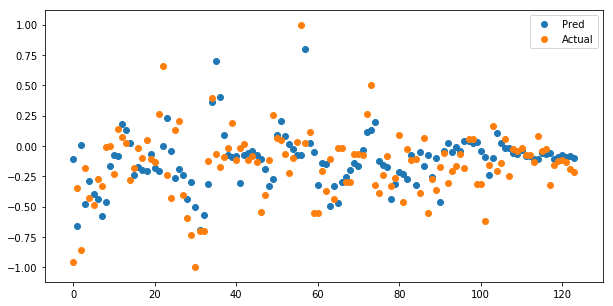

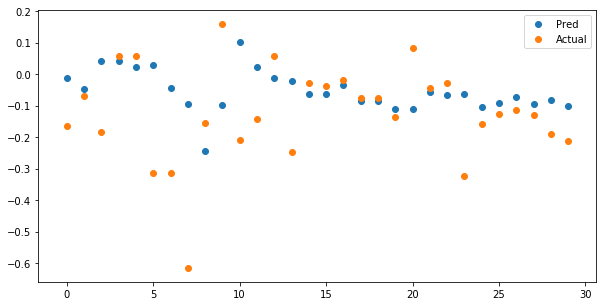

In [99]:
y_pred = model.predict(x_test)
plt.plot([0, len(y_pred)], [0, 0])
plt.plot(y_pred[1:],label='Pred')
plt.plot(y_test[1:],label='Actual')
plt.legend()
plt.show()
plt.scatter(range(len(y_test)),y_pred,label='Pred')
plt.scatter(range(len(y_test)),y_test,label='Actual')
#plt.plot(y_test[-31:],label='Actual-1')
plt.legend()
plt.show()
plt.scatter(range(len(y_test[-30:])),y_pred[-30:],label='Pred')
plt.scatter(range(len(y_test[-30:])),y_test[-30:],label='Actual')
plt.legend()
plt.show()

In [95]:
import util.trading_systems as ts

bl = int(items.getInfo(item)['buyLimit'])
print(len(x_test),len(y_test),len(p_test))
budgets = [10**5,10**6,10**7,10**8,10**9]
mpBest = [([-100],-1)] * len(budgets)
mpBestNoT = [[-100]] * len(budgets)
ppBest = [[-100]] * len(budgets)
bhBest = [[-100]] * len(budgets)
perBest = [[-100]] * len(budgets)

yp = model.predict(x_val)
yp = [classify(a) for a in yp]
for b in range(len(budgets)):
    t = 0
    for i in range(10):
        mp = ts.modelProfit(t,yp,p_val,bl,budgets[b])
        if mp[-1]>mpBest[b][0][-1] and mp[-1]!=0.0:
            mpBest[b] = (mp,t)
        t += .02

yp = model.predict(x_test)
yp = [classify(a) for a in yp]
for b in range(len(budgets)):
    print(budgets[b])
    t = 0
    bhBest[b] = ts.buyAndHold(p_test,bl,budgets[b])
    ppBest[b] = ts.perfectProfit(p_test,bl,budgets[b])
    perBest[b] = ts.persistanceProfit(p_test,bl,budgets[b])
    mpBest[b] = (ts.modelProfit(mpBest[b][1],yp,p_test,bl,budgets[b]),mpBest[b][1])
    mpBestNoT[b] = ts.modelProfit(0,yp,p_test,bl,budgets[b])

124 124 124
100000
1000000
10000000
100000000
1000000000


In [96]:
for b in range(len(budgets)):
    print(budgets[b])
    print('\tModel\n\t',mpBest[b][0][-1],mpBest[b][1])
    print('\tModel No T\n\t',mpBestNoT[b][-1],0)
    print('\tPersistance\n\t',perBest[b][-1])
    print('\tPerfect\n\t',ppBest[b][-1])
    print('\tBuy and Hold\n\t',bhBest[b][-1])

100000
	Model
	 -0.009165 0
	Model No T
	 -0.009165 0
	Persistance
	 0.055875
	Perfect
	 0.27248
	Buy and Hold
	 -0.08775
1000000
	Model
	 -0.008686 0
	Model No T
	 -0.008686 0
	Persistance
	 0.0585635
	Perfect
	 0.311898
	Buy and Hold
	 -0.08775
10000000
	Model
	 -0.0153545 0
	Model No T
	 -0.0153545 0
	Persistance
	 0.02529395
	Perfect
	 0.1391771
	Buy and Hold
	 -0.020475
100000000
	Model
	 -0.00153545 0
	Model No T
	 -0.00153545 0
	Persistance
	 0.0024143
	Perfect
	 0.01413545
	Buy and Hold
	 -0.0020475
1000000000
	Model
	 -0.000153545 0
	Model No T
	 -0.000153545 0
	Persistance
	 0.00024143
	Perfect
	 0.001413545
	Buy and Hold
	 -0.00020475


In [ ]:
for b in range(len(budgets)):
    print(len(mpBest[b][0]),len(perBest[b]),len(ppBest[b]),len(bhBest[b]))
    plt.plot(mpBest[b][0],label='Model')
    plt.plot(mpBestNoT[b],label='Model (no Tol)')
    plt.plot(perBest[b],label='Persist')
    plt.plot(ppBest[b],label='Perfect')
    plt.plot(bhBest[b],label='Buy&Hold')
    plt.legend()
    plt.show()